Using TensorFlow backend.
C:\Users\praneetha\miniconda3\envs\tf1_env\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\praneetha\miniconda3\envs\tf1_env\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\praneetha\miniconda3\envs\tf1_env\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\praneetha\minicon

Processing Final Results Comparison
Accuracy Score for C is 0.9472687939426717
Precision Score for C is 0.9334719334719335
Recall Score for C is 0.9315352697095436
F1 Score for C is 0.932502596053998
Cohen Kappa Score for C is 0.8892366419952427
ROC AUC Score for C is 0.9444532476434041
Confusion Matrix for C is [[2156   96]
 [  99 1347]]
Accuracy Score for L is 0.7893455922120065
Precision Score for L is 0.79493545183714
Recall Score for L is 0.8139298423995933
F1 Score for L is 0.8043205224817884
Cohen Kappa Score for L is 0.5762780970726299
ROC AUC Score for L is 0.78766971611603
Confusion Matrix for L is [[1318  413]
 [ 366 1601]]
Accuracy Score for R is 0.7598702001081665
Precision Score for R is 0.7899947889525795
Recall Score for R is 0.7576211894052973
F1 Score for R is 0.773469387755102
Cohen Kappa Score for R is 0.5182410690105309
ROC AUC Score for R is 0.7600716436124896
Confusion Matrix for R is [[1294  403]
 [ 485 1516]]
Accuracy Score for C is 0.8046511627906977
Precision

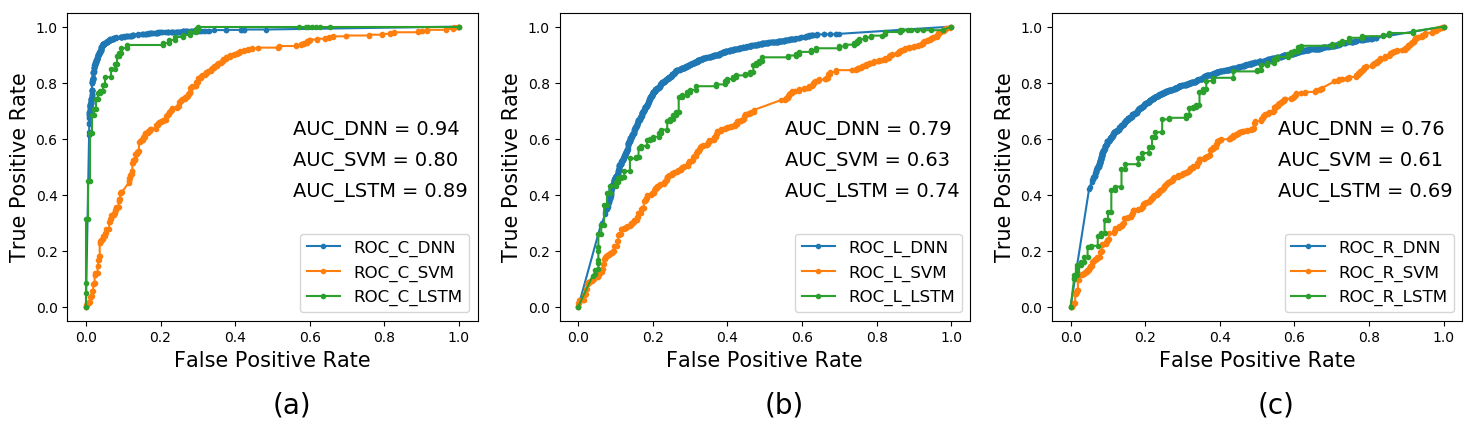

Average Precision Score for C is 0.9611724845574278
Average Precision Score for L is 0.8103663504692408
Average Precision Score for R is 0.833740173814003


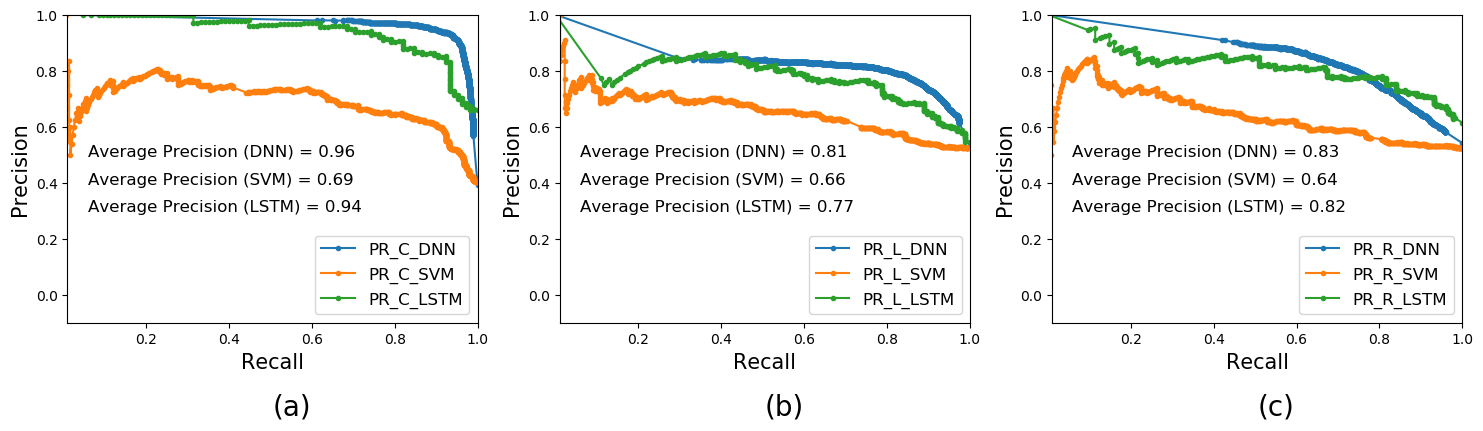

Processing Final Results DNN all data - trust, non-trust classification
Accuracy Score for Target is 0.9587264150943396
Precision Score for Target is 0.9373493975903614
Recall Score for Target is 0.9773869346733668
F1 Score for Target is 0.956949569495695
Cohen Kappa Score for Target is 0.9173452451237036
ROC AUC Score for Target is 0.9598045784477944
Confusion Matrix for Target is [[848  52]
 [ 18 778]]
Accuracy Score for Target is 0.8836477987421384
Precision Score for Target is 0.851024208566108
Recall Score for Target is 0.9364754098360656
F1 Score for Target is 0.8917073170731709
Cohen Kappa Score for Target is 0.7666186213189109
ROC AUC Score for Target is 0.8824007950467883
Confusion Matrix for Target is [[386  80]
 [ 31 457]]
Accuracy Score for Target is 0.8641509433962264
Precision Score for Target is 0.8295081967213115
Recall Score for Target is 0.9267399267399268
F1 Score for Target is 0.8754325259515571
Cohen Kappa Score for Target is 0.7270581503468994
ROC AUC Score for Ta

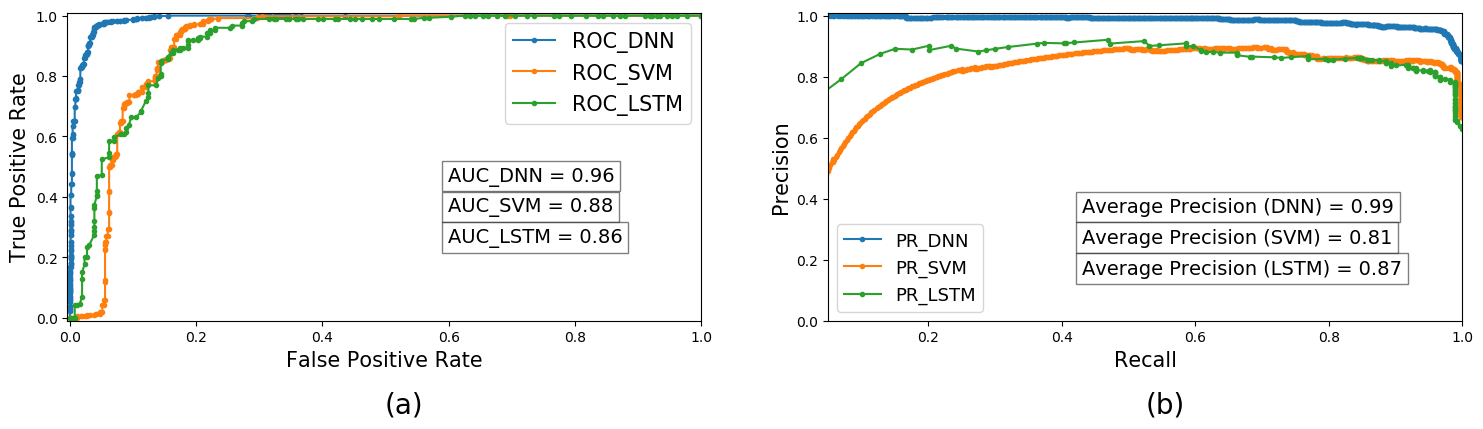

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Sat Nov  7 00:20:14 2020

@author: rajku
"""

import model as MD
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, average_precision_score
from sklearn import metrics
import numpy as np
from keras.models import Sequential
from sklearn.multiclass import OneVsRestClassifier
from keras.layers import Dense, LSTM

df_tr = MD.read_data(MD.filename, MD.features, MD.target, MD.sheet_name[0])  # Read the trustworthy data
df_utr = MD.read_data(MD.filename, MD.features, MD.target, MD.sheet_name[1])  # Read the untrustworthy data
df_combined = MD.prepare_data(df_tr, df_utr, True)

data_excel, data = MD.read_data_car(MD.filename_car, MD.data_car_columns, sheet_name='data_car')


def SVM():
    X_train, X_test, y_train, y_test = train_test_split(
        df_combined[MD.features].to_numpy(),
        np.array(df_combined[MD.target].iloc[:, 0].to_list()),
        test_size=0.2,
        random_state=109
    )  # 70% training and 30% test

    clf = svm.SVC(kernel='poly', degree=2, gamma='auto', probability=True)  # Linear Kernel

    # Train the model using the training sets
    clf.fit(X_train, y_train)

    # Predict the response for test dataset
    y_pred = clf.predict(X_test)
    y_prob = clf.predict_proba(X_test)

    df = MD.pd.concat(
        [MD.pd.DataFrame(y_test, columns=["Target"]), MD.pd.DataFrame(y_prob[:, 1], columns=['Prediction']),
         MD.pd.DataFrame(y_pred, columns=['Predicted_Class'])], axis=1)
    df.to_excel("data/Predictions_Binary_Class_SVM.xlsx", index=False)

    # Model Accuracy: how often is the classifier correct?
    print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

    # Model Precision: what percentage of positive tuples are labeled as such?
    print("Precision:", metrics.precision_score(y_test, y_pred))

    # Model Recall: what percentage of positive tuples are labelled as such?
    print("Recall:", metrics.recall_score(y_test, y_pred))

    return y_test, y_pred


def SVM_Multilevel():
    train_data, test_data = np.split(data.sample(frac=1), [int(0.7 * len(data))])
    feature_columns = [x for x in list(data.columns) if x not in MD.target_car]
    x_train = train_data[feature_columns].to_numpy()
    y_train = train_data[MD.target_car].to_numpy()

    x_test = test_data[feature_columns].to_numpy()
    y_test = test_data[MD.target_car].reset_index(drop=True)

    classifier = OneVsRestClassifier(svm.SVC(kernel='poly', degree=2, gamma='auto', probability=True))
    classifier.fit(x_train, y_train)
    prediction = classifier.predict(x_test)
    predicted_probability = classifier.predict_proba(x_test)
    print(accuracy_score(y_test, prediction))

    pred = MD.pd.DataFrame(prediction)
    pred.columns = MD.target_car

    pred_PR = MD.pd.DataFrame(predicted_probability)
    pred_PR.columns = MD.target_car
    for col in MD.target_car:
        print('Accuracy Score for {} is {}'.format(col, accuracy_score(y_test[col], pred[col])))
        print('AUC Score for {} is {}'.format(col, roc_auc_score(y_test[col], pred[col])))
        print('Precision Score Score for {} is {}'.format(col, precision_score(y_test[col], pred[col])))
        print('Average Precision Score Score for {} is {}'.format(col,
                                                                  average_precision_score(y_test[col], pred_PR[col])))

    df_pred = MD.pd.DataFrame([], columns=list(x + '_Pred' for x in list(y_test.columns)))

    for pred in predicted_probability:
        df_row = MD.pd.DataFrame([pred], columns=df_pred.columns)
        df_pred = MD.pd.concat([df_pred, df_row], ignore_index=True, axis=0)

    df_class = MD.pd.DataFrame(prediction)
    df_class.columns = list(x + '_Pred_Class' for x in list(y_test.columns))

    df = MD.pd.concat([y_test, df_pred, df_class], axis=1)

    df.to_excel("data/Predictions_Multi_Class_SVM.xlsx", index=False)

    return y_test, prediction


def LSTM_Keras(keras_df, features, target, direct=1):
    df_LSTM = keras_df.round(1)
    list_of_Values = list(df_LSTM.iloc[:, 0])

    for i in range(len(features)):
        list_of_Values.extend(list(df_LSTM.iloc[:, i]))

    X_train, X_test, y_train, y_test = train_test_split(
        df_LSTM[features].to_numpy(),
        np.array(df_LSTM[target]),
        test_size=0.2,
        random_state=109
    )  # 80% training and 20% test
    model = Sequential()

    n_timesteps = 1
    n_features = len(features)
    model.add(LSTM(100, activation='relu', input_shape=(n_timesteps, n_features)))

    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    # print(model.summary())

    n_samples = X_train.shape[0]
    X_train = X_train.reshape(n_samples, n_timesteps, n_features)

    model.fit(X_train, y_train, epochs=200, batch_size=64, verbose=0)
    # Final evaluation of the model

    n_samples = X_test.shape[0]
    X_test = X_test.reshape(n_samples, n_timesteps, n_features)
    scores = model.evaluate(X_test, y_test, verbose=0)
    print("Accuracy: %.2f%%" % (scores[1] * 100))

    prediction = model.predict(X_test)
    prediction = MD.pd.DataFrame(prediction, columns=['Predicted_Class'])
    prediction = prediction.gt(0.5).astype(int)
    predicted_probability = model.predict_proba(X_test)

    df = MD.pd.concat(
        [MD.pd.DataFrame(y_test, columns=["Target"]), MD.pd.DataFrame(predicted_probability, columns=['Prediction']),
         prediction], axis=1)

    if direct == 1:  # calling only for car trustworthiness:
        df.to_excel("data/Predictions_Binary_Class_LSTM.xlsx", index=False)
    else:
        df.to_excel("data/Predictions_Sensors_LSTM_" + target + ".xlsx", index=False)


def LSTM_Keras_Multilevel():
    feature_columns = [x for x in list(data.columns) if x not in MD.target_car]
    columns_with_target = [x for x in list(data.columns) if x not in MD.target_car]
    targets = MD.target_car

    for target in targets:
        columns_with_target.append(target)
        df_target = data[columns_with_target]
        LSTM_Keras(df_target, feature_columns, target, 0)


def final_result_analysis_sensors_comparison():
    # This function similar to MD.final_result_analysis(), but adding a comparison with SVM and LSRM
    print('Processing Final Results Comparison')
    data_excel, data = MD.read_data_car(MD.filename_car, MD.data_car_columns, sheet_name='data_car')
    df_final = MD.pd.read_excel(MD.filename_analysis)
    df_final_SVM = MD.pd.read_excel("data/Final_Results/Predictions_Multi_Class_SVM_PR_ROC_Poly_2.xlsx")
    df_final_LSTM = MD.pd.read_excel("data/Final_Results/Predictions_Multi_Class_LSTM_PR_ROC.xlsx")

    columns = ['C', 'L', 'R', 'C_Pred', 'L_Pred', 'R_Pred', 'C_Pred_Class', 'L_Pred_Class', 'R_Pred_Class']

    df_final = df_final[columns]
    df_final_SVM = df_final_SVM[columns]
    df_final_LSTM = df_final_LSTM[columns]

    Model_Eval = MD.ME.Model_Evaluation("Keras_Multiclass_Classifier_Car")

    Model_Eval.metrics_printer(df_final, len(MD.target_car), 6)
    Model_Eval.metrics_printer(df_final_SVM, len(MD.target_car), 6)
    Model_Eval.metrics_printer(df_final_LSTM, len(MD.target_car), 6)
    Model_Eval.ROC_Curve_Generator_Subplot_Comparison(df_final, df_final_SVM, df_final_LSTM, len(MD.target_car),
                                                      3)  # Ofset to the real probability not the class level, see the df and the generated excel file

    Model_Eval.PR_Curve_Generator_Subplot_Comparison(df_final, df_final_SVM, df_final_LSTM, len(MD.target_car), 3, data,
                                                     list(data.columns).index(
                                                         'C'))  # adjust to 3 when phasetime will be added as feature set


def final_result_analysis_comparison():
    print('Processing Final Results DNN all data - trust, non-trust classification')

    df_tr = MD.read_data(MD.filename, MD.features, MD.target, MD.sheet_name[0])  # Read the trustworthy data
    df_utr = MD.read_data(MD.filename, MD.features, MD.target, MD.sheet_name[1])  # Read the untrustworthy data
    df_combined = MD.prepare_data(df_tr, df_utr, True)

    df_final = MD.pd.read_excel(MD.filename_analysis_Keras)
    df_final_SVM = MD.pd.read_excel("data/Final_Results/Predictions_PR_ROC_SVM_Poly_2.xlsx")
    df_final_LSTM = MD.pd.read_excel("data/Final_Results/Predictions_PR_ROC_LSTM.xlsx")

    columns = ['Target', 'Prediction', 'Class']
    df_final = df_final[columns]
    df_final_SVM = df_final_SVM[columns]
    df_final_LSTM = df_final_LSTM[columns]

    Model_Eval = MD.ME.Model_Evaluation("Evaluating DNN classifier for trus vs non-trust")
    Model_Eval.metrics_printer(df_final, len(MD.target), 2)
    Model_Eval.metrics_printer(df_final_SVM, len(MD.target), 2)
    Model_Eval.metrics_printer(df_final_LSTM, len(MD.target), 2)
    Model_Eval.figure_generator_single_output_comparison(df_final, df_final_SVM, df_final_LSTM, len(MD.target), 1,
                                                         df_combined, list(df_combined.columns).index('Two_Class'))


def main():
    #    y_test, prediction = SVM()
    #    LSTM_Keras(df_combined, MD.features, MD.target)
    y_test, prediction = SVM_Multilevel()
    #    LSTM_Keras_Multilevel()
    return y_test, prediction


"""
ReadME: Run any individual method above, SVM and SVM_Miltilevel, and LSTM and LSTM_Multilevel
Post process the data accordingly, the individual runs save results to a file, which
needs to be added into another file for producing the final result files.
"""
if __name__ == '__main__':
    #  y_test, prediction =  main()
    #    main()
    final_result_analysis_sensors_comparison()
    final_result_analysis_comparison()
